<a href="https://colab.research.google.com/github/joseyalfredogonzalias-hub/BiodivInsights/blob/master/Copia_de_ambiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Si necesitas instalar pandas, descomenta esta línea:
# !pip install pandas



In [ ]:
import pandas as pd
import zipfile
import os

# Define the path to the uploaded zip file
zip_file_path = 'WDPA_WDOECM_Oct2025_Public_all_csv (1).zip'

# Extract the CSV file from the zip archive
# Assuming the CSV file inside the zip has the same name as the zip file without the .zip extension
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the name of the first file in the zip archive (assuming it's the CSV)
    csv_file_name = zip_ref.namelist()[0]
    zip_ref.extractall() # Extract all contents to the current directory

# Cargar el archivo CSV extraído
file_path = csv_file_name  # Use the extracted CSV file name
wdpa_data = pd.read_csv(file_path)

# Limpiar y estructurar el dataset, seleccionando solo las columnas que necesitamos
# Based on the available columns, here are some potentially relevant ones.
# Adjust this list as needed for your analysis.
required_columns = ['WDPAID', 'NAME', 'DESIG_ENG', 'IUCN_CAT', 'MARINE', 'REP_AREA', 'GIS_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE', 'MANG_AUTH', 'PARENT_ISO3', 'ISO3']

# Check if all required columns exist in the DataFrame
missing_columns = [col for col in required_columns if col not in wdpa_data.columns]
if missing_columns:
    print(f"Warning: The following required columns were not found in the dataset: {missing_columns}")
    # Proceed with the columns that are present
    wdpa_cleaned = wdpa_data[[col for col in required_columns if col in wdpa_data.columns]]
else:
    wdpa_cleaned = wdpa_data[required_columns]


# Verificar si hay valores faltantes
missing_values = wdpa_cleaned.isnull().sum()

# Mostrar las primeras filas del dataset limpio
print("Primeras filas del dataset limpio:")
display(wdpa_cleaned.head())

# Mostrar la cantidad de valores faltantes por columna
print("Valores faltantes por columna:")
display(missing_values)

# Guardar el dataset limpio como un archivo CSV
output_file_path = 'WDPA_cleaned_dataset.csv'  # Puedes cambiar esta ruta si lo deseas
wdpa_cleaned.to_csv(output_file_path, index=False)

# Imprimir la ruta donde se guardó el archivo limpio
print(f"Dataset limpio guardado en: {output_file_path}")

/tmp/ipython-input-1869676118.py:17: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  wdpa_data = pd.read_csv(file_path)


Primeras filas del dataset limpio:


,WDPAID,NAME,DESIG_ENG,IUCN_CAT,MARINE,REP_AREA,GIS_AREA,STATUS,STATUS_YR,GOV_TYPE,OWN_TYPE,MANG_AUTH,PARENT_ISO3,ISO3
0,555698070,Sitio Histórico e Patrimonio Cultural Kalunga,Historical and Cultural Heritage Site,VI,0,2619.999000,2816.320433,Established,0,Local communities,Communal,Associação Quilombo Kalunga,BRA,BRA
1,555645336,Pangasananan,Ancestral Domain,VI,0,69.960000,69.500970,Established,0,Indigenous peoples,Contested,Kamalaasan (Council of Elders); Hawudon (Commu...,PHL,PHL
2,555645495,Inuyog No Banwa,Conserved habitat,VI,0,97.890000,97.254113,Established,0,Collaborative governance,Contested,Manigaon (Council Elders); Datu (Community Lea...,PHL,PHL
3,311034,Little Waitaha River,Stewardship Area,III,0,0.477749,1.354440,Designated,1987,Federal or national ministry or agency,Not Reported,Department of Conservation,NZL,NZL
4,308185,Waianakarua,Scenic Reserve,III,0,41.471982,41.471558,Designated,1905,Federal or national ministry or agency,Not Reported,Department of Conservation,NZL,NZL


Valores faltantes por columna:


,0
WDPAID,0
NAME,0
DESIG_ENG,0
IUCN_CAT,0
MARINE,0
REP_AREA,0
GIS_AREA,12067
STATUS,0
STATUS_YR,0
GOV_TYPE,0


Dataset limpio guardado en: WDPA_cleaned_dataset.csv


In [ ]:
from google.colab import files
files.download('WDPA_cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Cargar el archivo CSV (asegúrate de usar el nombre correcto del archivo subido)
archivo = 'WDPA_sources_Oct2025.csv'  # Cambia esta ruta si es necesario
datos = pd.read_csv(archivo)

# Limpiar y estructurar el dataset, seleccionando solo las columnas necesarias
datos_limpios = datos[['metadataid', 'data_title', 'resp_party', 'year', 'update_yr', 'ref_system',
                       'scale', 'lineage', 'citation', 'disclaimer', 'language', 'verifier']]

# Verificar si hay valores faltantes
valores_faltantes = datos_limpios.isnull().sum()

# Mostrar las primeras filas del dataset limpio
print("Primeras filas del dataset limpio:")
print(datos_limpios.head())

# Mostrar la cantidad de valores faltantes por columna
print("Valores faltantes por columna:")
print(valores_faltantes)

# Guardar el dataset limpio como un archivo CSV
ruta_salida = 'WDPA_dataset_limpio.csv'  # Cambia la ruta si lo deseas
datos_limpios.to_csv(ruta_salida, index=False)

# Imprimir la ruta donde se guardó el archivo limpio
print(f"Dataset limpio guardado en: {ruta_salida}")


Primeras filas del dataset limpio:
   metadataid                     data_title  \
0         621  Protected Areas of St Helena    
1           6       Protected areas of Benin   
2          10     Protected Areas of Belarus   
3          13     Protected Areas of Bermuda   
4          73      Protected Areas of Guinea   

                                          resp_party  year update_yr  \
0                               St Helena Government  2003      2024   
1  Insititut National de l'Information géographiq...  1984      1984   
2  Department of Environment and Protection, Belarus  1996      1996   
3  Government of Bermuda, Department of Environme...  1990      2024   
4  Centre Technique Forestier Tropical (CTFT)/ Bu...  1989      1989   

                                          ref_system         scale  \
0                                       Not Reported  Not Reported   
1                                       Not Reported     1:600,000   
2  Transverse Mercator Central Me

In [ ]:
import pandas as pd

# Cargar el archivo CSV (asegúrate de usar el nombre correcto del archivo subido)
archivo = 'WDPA_sources_Oct2025.csv'  # Cambia esta ruta si es necesario
datos = pd.read_csv(archivo)

# Limpiar y estructurar el dataset, seleccionando solo las columnas necesarias
datos_limpios = datos[['metadataid', 'data_title', 'resp_party', 'year', 'update_yr', 'ref_system',
                       'scale', 'lineage', 'citation', 'disclaimer', 'language', 'verifier']]

# Verificar si hay valores faltantes
valores_faltantes = datos_limpios.isnull().sum()

# Mostrar las primeras filas del dataset limpio
print("Primeras filas del dataset limpio:")
print(datos_limpios.head())

# Mostrar la cantidad de valores faltantes por columna
print("Valores faltantes por columna:")
print(valores_faltantes)

# Guardar el dataset limpio como un archivo CSV
ruta_salida = 'WDPA_dataset_limpio.csv'  # Cambia la ruta si lo deseas
datos_limpios.to_csv(ruta_salida, index=False)

# Imprimir la ruta donde se guardó el archivo limpio
print(f"Dataset limpio guardado en: {ruta_salida}")


Primeras filas del dataset limpio:
   metadataid                     data_title  \
0         621  Protected Areas of St Helena    
1           6       Protected areas of Benin   
2          10     Protected Areas of Belarus   
3          13     Protected Areas of Bermuda   
4          73      Protected Areas of Guinea   

                                          resp_party  year update_yr  \
0                               St Helena Government  2003      2024   
1  Insititut National de l'Information géographiq...  1984      1984   
2  Department of Environment and Protection, Belarus  1996      1996   
3  Government of Bermuda, Department of Environme...  1990      2024   
4  Centre Technique Forestier Tropical (CTFT)/ Bu...  1989      1989   

                                          ref_system         scale  \
0                                       Not Reported  Not Reported   
1                                       Not Reported     1:600,000   
2  Transverse Mercator Central Me

In [ ]:
from google.colab import files
files.download('WDPA_dataset_limpio.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-1507729367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_limpios, x='year', palette='viridis')


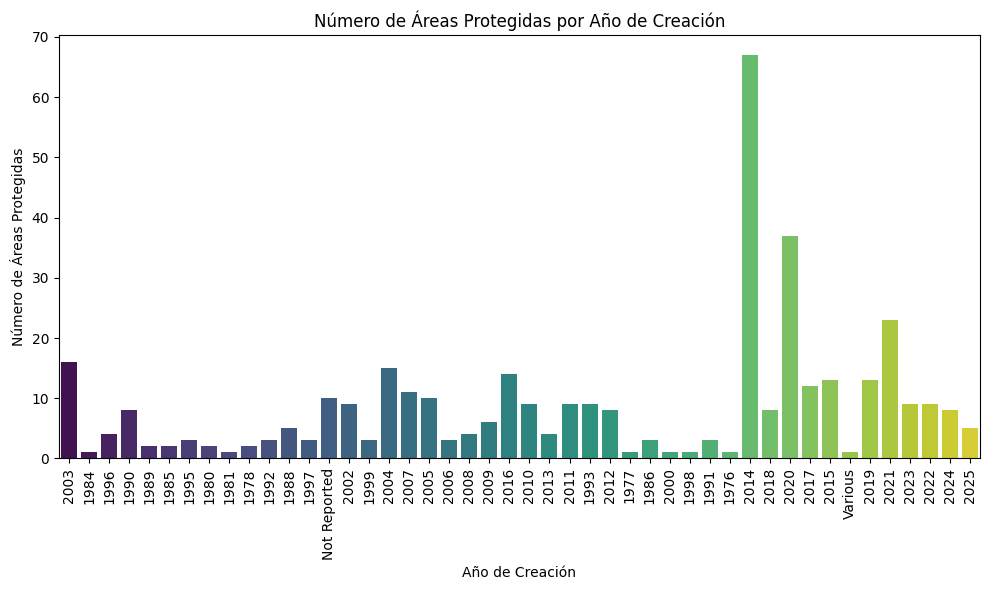

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras con el número de áreas protegidas por año de creación
plt.figure(figsize=(10,6))
sns.countplot(data=datos_limpios, x='year', palette='viridis')
plt.title('Número de Áreas Protegidas por Año de Creación')
plt.xlabel('Año de Creación')
plt.ylabel('Número de Áreas Protegidas')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()


/tmp/ipython-input-31636754.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_limpios[datos_limpios['year'].isin(anos_frecuentes)], x='year', palette='viridis')


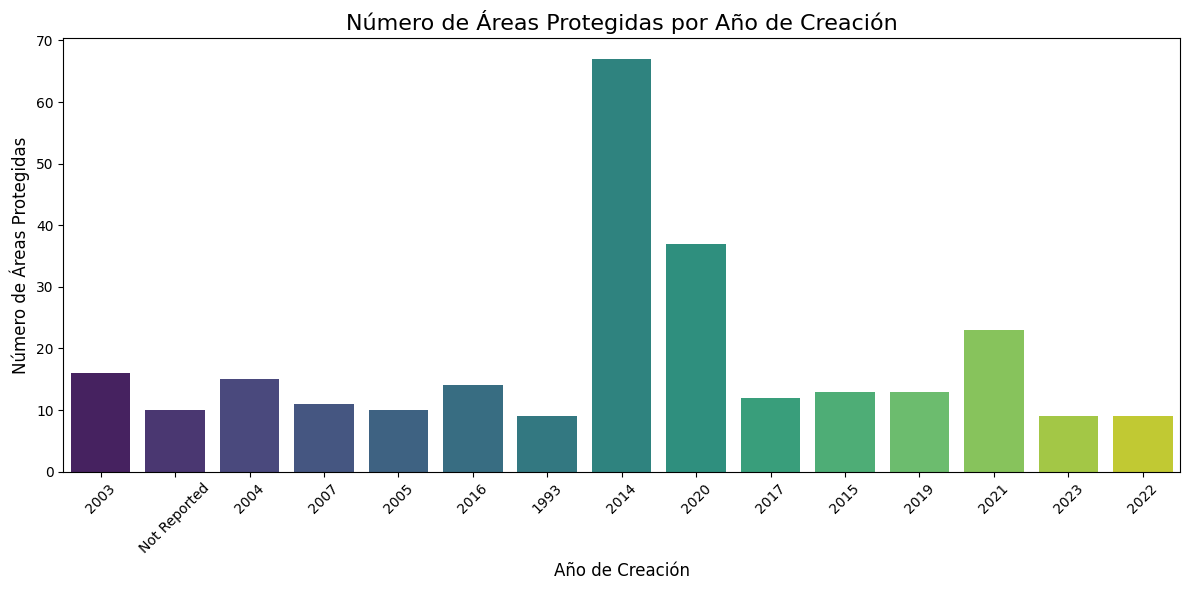

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limitar el número de años en el gráfico para evitar desorden
anos_frecuentes = datos_limpios['year'].value_counts().index[:15]  # Solo los 15 años más frecuentes

# Ajustar el tamaño de la gráfica
plt.figure(figsize=(12,6))

# Crear el gráfico de barras con el número de áreas protegidas por año de creación
sns.countplot(data=datos_limpios[datos_limpios['year'].isin(anos_frecuentes)], x='year', palette='viridis')

# Mejorar la visualización con títulos y etiquetas
plt.title('Número de Áreas Protegidas por Año de Creación', fontsize=16)
plt.xlabel('Año de Creación', fontsize=12)
plt.ylabel('Número de Áreas Protegidas', fontsize=12)

# Rotar las etiquetas del eje X para mayor claridad
plt.xticks(rotation=45)

# Ajustar la disposición
plt.tight_layout()
plt.show()


/tmp/ipython-input-2578641233.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_limpios, y='resp_party', palette='muted', order=datos_limpios['resp_party'].value_counts().index[:10])


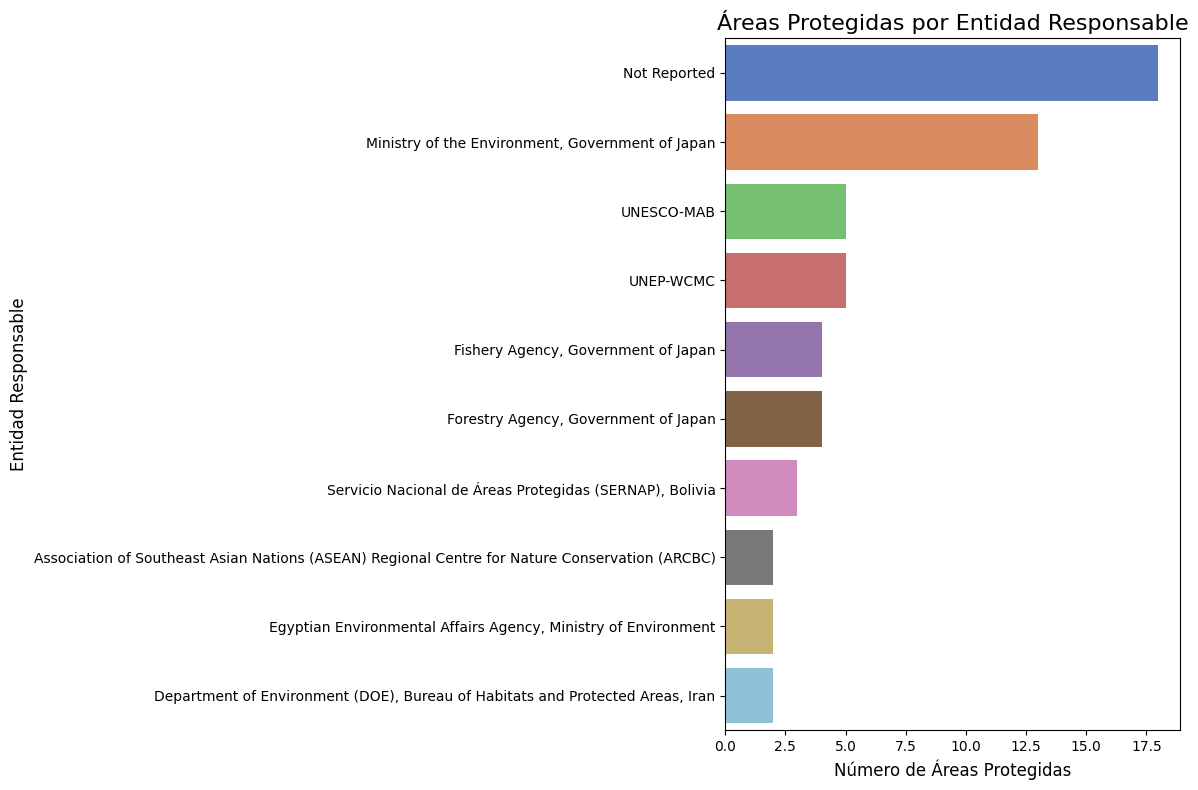

In [ ]:
# Ajustar el tamaño de la gráfica
plt.figure(figsize=(12,8))

# Crear el gráfico de barras con las 10 entidades responsables más comunes
sns.countplot(data=datos_limpios, y='resp_party', palette='muted', order=datos_limpios['resp_party'].value_counts().index[:10])

# Mejorar la visualización con títulos y etiquetas
plt.title('Áreas Protegidas por Entidad Responsable', fontsize=16)
plt.xlabel('Número de Áreas Protegidas', fontsize=12)
plt.ylabel('Entidad Responsable', fontsize=12)

# Ajustar la disposición
plt.tight_layout()
plt.show()
